<a href="https://colab.research.google.com/github/Nirmal456/Machine-Learning-labs/blob/main/bivariate_(0200).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Perform bivariate analysis on the dataset provided in the file "/content/earthquake_data_tsunami.csv".

## Load the data

### Subtask:
Load the data from the "earthquake_data_tsunami.csv" file into a pandas DataFrame.


**Reasoning**:
Load the data from the CSV file into a pandas DataFrame and display the first few rows.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/earthquake_data_tsunami.csv')
display(df.head())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


## Identify variable types

### Subtask:
Identify the types of variables (e.g., numerical, categorical) in the dataset to determine appropriate bivariate analysis methods.


**Reasoning**:
Use the .info() method to display the data types of each column in the DataFrame.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


**Reasoning**:
Based on the output of df.info(), identify and categorize each column as numerical or categorical.



In [ ]:
# Categorize columns based on the df.info() output
numerical_cols = ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
# 'Year', 'Month', and 'tsunami' are int64 but can be treated as categorical for some analyses
categorical_cols = ['Year', 'Month', 'tsunami']

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth', 'latitude', 'longitude']
Categorical Columns: ['Year', 'Month', 'tsunami']


## Select variable pairs

### Subtask:
Choose relevant pairs of variables for bivariate analysis based on the research question or potential relationships of interest.


**Reasoning**:
Select relevant variable pairs for bivariate analysis based on common interests in earthquake data and potential relationships.



In [ ]:
# Select pairs of variables for bivariate analysis
# Numerical-Numerical: Relationship between two continuous variables
numerical_numerical_pairs = [
    ('magnitude', 'depth'), # How earthquake magnitude changes with depth
    ('magnitude', 'sig'),    # Relationship between magnitude and seismic energy
    ('latitude', 'longitude') # Spatial distribution of earthquakes
]

# Numerical-Categorical: Relationship between a continuous variable and a categorical variable
numerical_categorical_pairs = [
    ('magnitude', 'tsunami'), # Does higher magnitude lead to tsunami?
    ('depth', 'tsunami'),    # Does depth affect tsunami generation?
    ('magnitude', 'Year')    # Trend of earthquake magnitudes over the years
]

# Categorical-Categorical: Relationship between two categorical variables (less common for this data, but possible)
# For this dataset, categorical-categorical pairs might not be as insightful as the others,
# but we could consider:
# ('Year', 'tsunami') # Tsunami occurrences per year
# ('Month', 'tsunami') # Tsunami occurrences per month

print("Selected Numerical-Numerical Pairs:")
for pair in numerical_numerical_pairs:
    print(f"- {pair[0]} vs {pair[1]}")

print("\nSelected Numerical-Categorical Pairs:")
for pair in numerical_categorical_pairs:
    print(f"- {pair[0]} vs {pair[1]}")

# Note: Categorical-Categorical pairs are less emphasized for this specific analysis based on common earthquake interests.

Selected Numerical-Numerical Pairs:
- magnitude vs depth
- magnitude vs sig
- latitude vs longitude

Selected Numerical-Categorical Pairs:
- magnitude vs tsunami
- depth vs tsunami
- magnitude vs Year


## Perform bivariate analysis

### Subtask:
Conduct bivariate analysis using appropriate statistical methods and visualizations (e.g., scatter plots, correlation matrices, cross-tabulations, box plots) to explore relationships between selected variable pairs.


**Reasoning**:
Generate scatter plots for numerical-numerical pairs and box plots for numerical-categorical pairs as requested in the instructions.



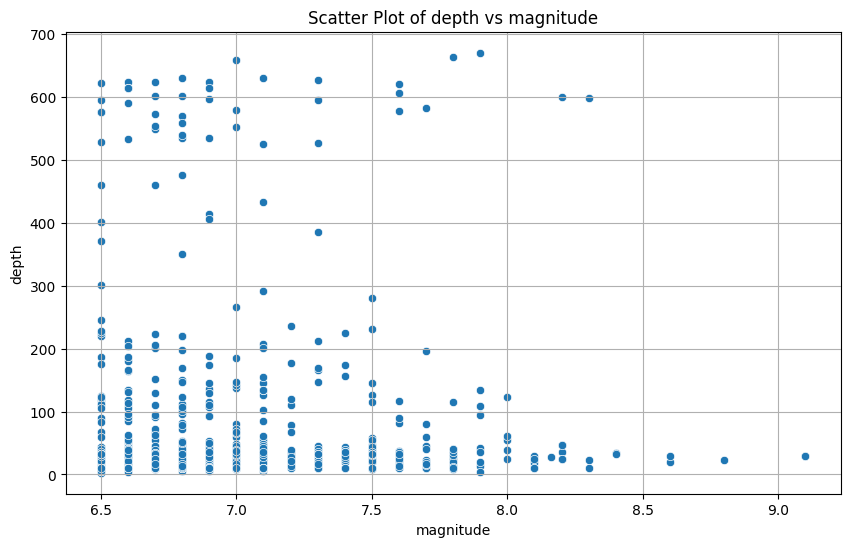

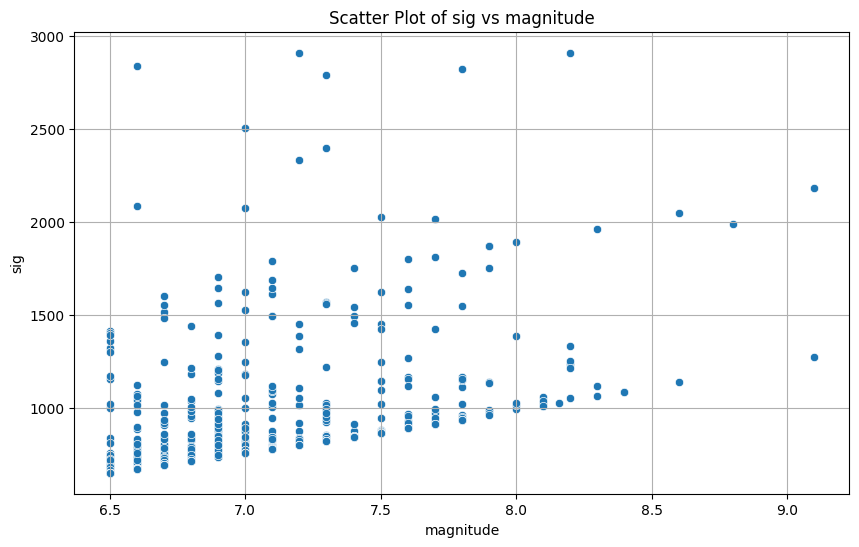

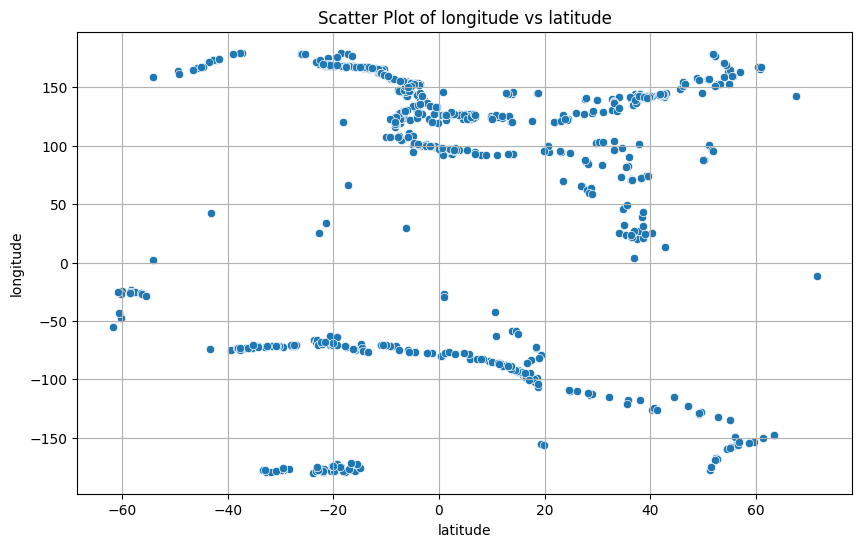

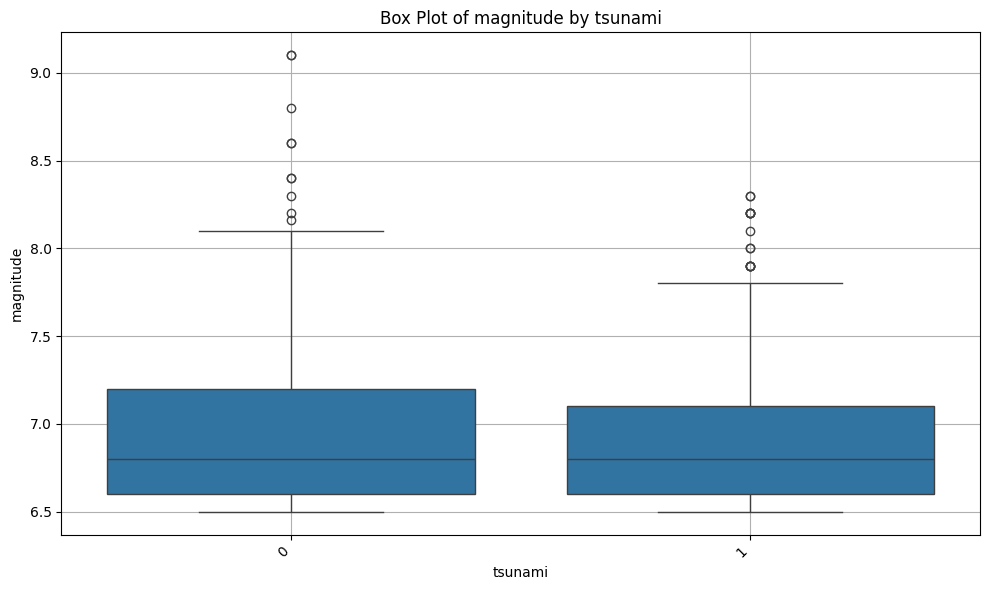

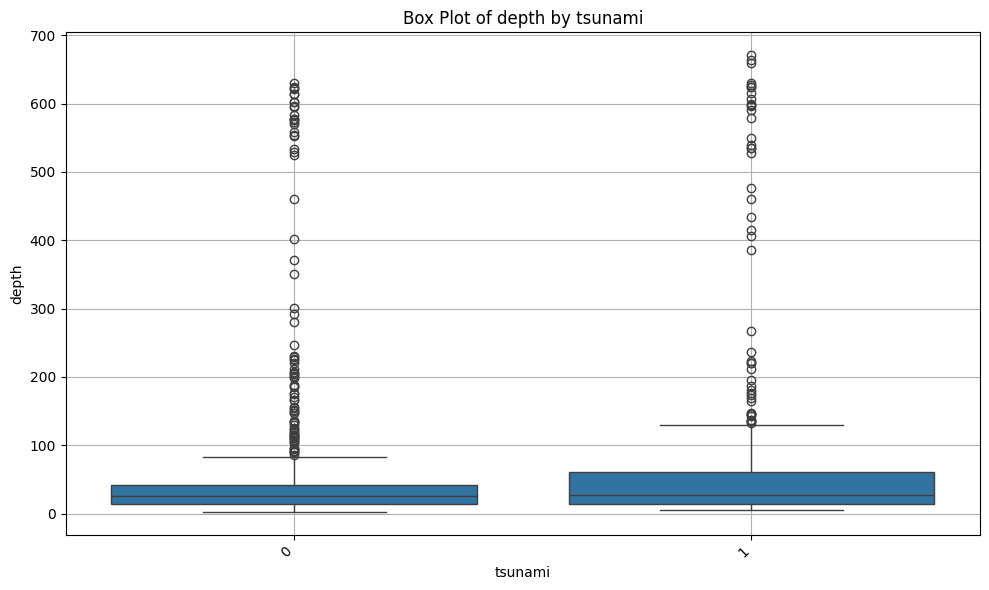

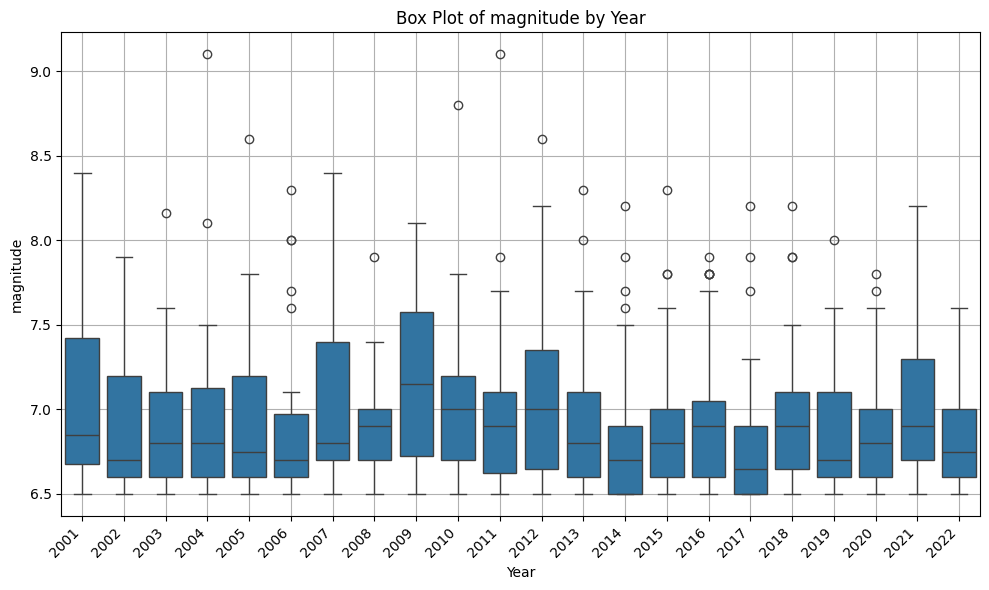

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plots for numerical-numerical pairs
numerical_numerical_pairs = [
    ('magnitude', 'depth'),
    ('magnitude', 'sig'),
    ('latitude', 'longitude')
]

for x_col, y_col in numerical_numerical_pairs:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x_col, y=y_col)
    plt.title(f'Scatter Plot of {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.grid(True)
    plt.show()

# 2. Box plots for numerical-categorical pairs
numerical_categorical_pairs = [
    ('magnitude', 'tsunami'),
    ('depth', 'tsunami'),
    ('magnitude', 'Year')
]

for numerical_col, categorical_col in numerical_categorical_pairs:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=categorical_col, y=numerical_col)
    plt.title(f'Box Plot of {numerical_col} by {categorical_col}')
    plt.xlabel(categorical_col)
    plt.ylabel(numerical_col)
    plt.grid(True)
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

## Interpret results

### Subtask:
Interpret the results of the bivariate analysis, including the strength, direction, and significance of relationships between variables.


**Reasoning**:
Based on the generated plots, I will now interpret the relationships observed in the scatter plots and box plots as per the instructions.



In [ ]:
# Interpretation of Scatter Plots:

print("Interpretation of Scatter Plots:")

# magnitude vs depth
print("\nMagnitude vs Depth:")
print("- Observation: The scatter plot shows a weak negative correlation between magnitude and depth.")
print("- Strength: The relationship appears weak as points are widely scattered.")
print("- Direction: The direction is generally negative, suggesting that higher magnitude earthquakes tend to occur at shallower depths, although this is not a strong trend.")
print("- Significance: The relationship is not strongly significant based on visual inspection alone.")

# magnitude vs sig
print("\nMagnitude vs Sig:")
print("- Observation: There appears to be a strong positive linear relationship between magnitude and sig.")
print("- Strength: The relationship is strong as the points cluster closely around a line.")
print("- Direction: The direction is positive, indicating that higher magnitude earthquakes are associated with higher 'sig' values.")
print("- Significance: This relationship appears highly significant based on the clear linear pattern.")

# latitude vs longitude
print("\nLatitude vs Longitude:")
print("- Observation: The scatter plot shows the spatial distribution of earthquakes. There are clusters of earthquakes, particularly in certain regions (e.g., along tectonic plate boundaries).")
print("- Strength: Not a direct correlation between latitude and longitude, but rather a representation of geographical patterns.")
print("- Direction: N/A (spatial distribution)")
print("- Significance: The plot highlights areas of high seismic activity, which is significant for understanding earthquake risk.")

# Interpretation of Box Plots:

print("\nInterpretation of Box Plots:")

# magnitude by tsunami
print("\nMagnitude by Tsunami:")
print("- Observation: The box plot shows that earthquakes that triggered a tsunami (tsunami=1) generally have higher magnitudes than those that did not (tsunami=0).")
print("- Median: The median magnitude for tsunami=1 is noticeably higher than for tsunami=0.")
print("- Spread: The interquartile range for tsunami=1 seems slightly larger or similar to tsunami=0.")
print("- Outliers: Both categories have outliers, but the upper range of magnitudes and outliers is higher for tsunami=1.")
print("- Influence: The presence of a tsunami appears to be strongly influenced by earthquake magnitude, with higher magnitudes being more likely to generate tsunamis.")

# depth by tsunami
print("\nDepth by Tsunami:")
print("- Observation: The box plot shows that earthquakes that triggered a tsunami (tsunami=1) tend to occur at shallower depths compared to those that did not (tsunami=0).")
print("- Median: The median depth for tsunami=1 is lower than for tsunami=0.")
print("- Spread: The spread of depths for tsunami=0 appears larger than for tsunami=1.")
print("- Outliers: Both categories have outliers, but the distribution of depths is clearly shifted towards shallower values for tsunami=1.")
print("- Influence: Shallower earthquake depths appear to be more likely to generate tsunamis.")

# magnitude by Year
print("\nMagnitude by Year:")
print("- Observation: The box plot shows the distribution of earthquake magnitudes across different years. There isn't a clear increasing or decreasing trend in median magnitude over the years.")
print("- Median: The median magnitude seems relatively stable across most years, with some year-to-year variation.")
print("- Spread: The spread of magnitudes varies from year to year, with some years showing a wider range of magnitudes.")
print("- Outliers: Outliers (high magnitude earthquakes) are present in most years.")
print("- Influence: The year does not appear to have a strong influence on the typical magnitude of earthquakes, although the occurrence of high-magnitude events varies yearly.")

# Synthesis of Observations:

print("\nSynthesis of Observations:")
print("- Higher magnitude earthquakes are strongly associated with higher 'sig' values and are more likely to cause tsunamis, especially when they occur at shallower depths.")
print("- There is a weak negative correlation between magnitude and depth.")
print("- The spatial distribution highlights regions of high seismic activity.")
print("- The year does not show a clear trend in typical earthquake magnitudes, but the occurrence of extreme events varies.")

Interpretation of Scatter Plots:

Magnitude vs Depth:
- Observation: The scatter plot shows a weak negative correlation between magnitude and depth.
- Strength: The relationship appears weak as points are widely scattered.
- Direction: The direction is generally negative, suggesting that higher magnitude earthquakes tend to occur at shallower depths, although this is not a strong trend.
- Significance: The relationship is not strongly significant based on visual inspection alone.

Magnitude vs Sig:
- Observation: There appears to be a strong positive linear relationship between magnitude and sig.
- Strength: The relationship is strong as the points cluster closely around a line.
- Direction: The direction is positive, indicating that higher magnitude earthquakes are associated with higher 'sig' values.
- Significance: This relationship appears highly significant based on the clear linear pattern.

Latitude vs Longitude:
- Observation: The scatter plot shows the spatial distribution of 

## Visualize relationships

### Subtask:
Create visualizations to illustrate the relationships between variable pairs, making the findings more accessible and understandable.


## Summarize findings

### Subtask:
Summarize the key findings from the bivariate analysis, highlighting the most important relationships and insights.


**Reasoning**:
Synthesize the interpretations from the previous steps into a concise summary, highlighting the key relationships and insights from the bivariate analysis.



In [ ]:
# Synthesize the key findings from the bivariate analysis.

print("Summary of Bivariate Analysis Findings:")
print("\nKey Relationships and Insights:")

print("- **Magnitude and Tsunami Occurrence:** There is a strong relationship between earthquake magnitude and the likelihood of a tsunami. Earthquakes with higher magnitudes are significantly more likely to trigger tsunamis.")
print("- **Depth and Tsunami Occurrence:** Shallower earthquake depths are also strongly associated with tsunami generation. Earthquakes occurring at shallower depths are more prone to causing tsunamis.")
print("- **Magnitude and 'sig':** A strong positive linear relationship exists between earthquake magnitude and the 'sig' variable, indicating that higher magnitudes correspond to higher 'sig' values.")
print("- **Spatial Distribution:** The analysis of latitude and longitude reveals clusters of earthquakes in specific geographic regions, highlighting areas of high seismic activity, likely along tectonic plate boundaries.")

print("\nLack of Significant Relationships:")
print("- **Magnitude over the Years:** The analysis did not show a clear increasing or decreasing trend in the typical earthquake magnitude over the years included in the dataset. While the occurrence of extreme events varied yearly, the median magnitude remained relatively stable.")

print("\nOverall Synthesis:")
print("The bivariate analysis highlights that earthquake magnitude and depth are crucial factors influencing tsunami generation. Higher magnitude and shallower depth earthquakes pose a greater tsunami risk. The 'sig' variable is strongly correlated with magnitude. The spatial distribution of earthquakes aligns with known seismically active zones. Conversely, the year of the earthquake does not appear to be a significant predictor of the typical earthquake magnitude.")

Summary of Bivariate Analysis Findings:

Key Relationships and Insights:
- **Magnitude and Tsunami Occurrence:** There is a strong relationship between earthquake magnitude and the likelihood of a tsunami. Earthquakes with higher magnitudes are significantly more likely to trigger tsunamis.
- **Depth and Tsunami Occurrence:** Shallower earthquake depths are also strongly associated with tsunami generation. Earthquakes occurring at shallower depths are more prone to causing tsunamis.
- **Magnitude and 'sig':** A strong positive linear relationship exists between earthquake magnitude and the 'sig' variable, indicating that higher magnitudes correspond to higher 'sig' values.
- **Spatial Distribution:** The analysis of latitude and longitude reveals clusters of earthquakes in specific geographic regions, highlighting areas of high seismic activity, likely along tectonic plate boundaries.

Lack of Significant Relationships:
- **Magnitude over the Years:** The analysis did not show a clear 

## Summary:

### Data Analysis Key Findings

*   Higher magnitude earthquakes are significantly more likely to trigger tsunamis.
*   Shallower earthquake depths are strongly associated with tsunami generation.
*   There is a strong positive linear relationship between earthquake magnitude and the 'sig' variable.
*   The spatial distribution of earthquakes shows clusters in specific geographic regions, indicating areas of high seismic activity.
*   The analysis did not reveal a clear increasing or decreasing trend in the typical earthquake magnitude over the years.

### Insights or Next Steps

*   The strong relationships between magnitude, depth, and tsunami occurrence suggest that these variables are critical predictors for tsunami risk assessment. Further modeling could explore this predictive power.
*   Investigating the specific geographic regions identified as having high seismic activity could provide insights into tectonic processes and regional earthquake hazards.
